# *Import Libraries:*

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# *Preprocessing:*

In [2]:
df = pd.read_csv('Dataset.csv')
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [3]:
df.shape

(480, 17)

In [4]:
df['Class'].unique()

array(['M', 'L', 'H'], dtype=object)

In [5]:
# convert 'Class' into binary classification
df['Class'] = df['Class'].replace(['H', 'M'], 'A') # accept
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,A
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,A
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,A


In [6]:
df.dtypes

gender                      object
NationalITy                 object
PlaceofBirth                object
StageID                     object
GradeID                     object
SectionID                   object
Topic                       object
Semester                    object
Relation                    object
raisedhands                  int64
VisITedResources             int64
AnnouncementsView            int64
Discussion                   int64
ParentAnsweringSurvey       object
ParentschoolSatisfaction    object
StudentAbsenceDays          object
Class                       object
dtype: object

In [7]:
categorical_attr = df.columns[df.dtypes == 'object']
categorical_attr

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey',
       'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class'],
      dtype='object')

In [8]:
# Converting Categorical values to scaler values
le = LabelEncoder()
df[categorical_attr] = df[categorical_attr].apply(le.fit_transform, axis=0)
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,15,16,2,20,1,1,1,0
1,1,4,4,2,1,0,7,0,0,20,20,3,25,1,1,1,0
2,1,4,4,2,1,0,7,0,0,10,7,0,30,0,0,0,1
3,1,4,4,2,1,0,7,0,0,30,25,5,35,0,0,0,1
4,1,4,4,2,1,0,7,0,0,40,50,12,50,0,0,0,0


In [9]:
# Modify the class column --> 1 means accept
swap = {"Class": {1:0, 0:1}} 
df = df.replace(swap)
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,15,16,2,20,1,1,1,1
1,1,4,4,2,1,0,7,0,0,20,20,3,25,1,1,1,1
2,1,4,4,2,1,0,7,0,0,10,7,0,30,0,0,0,0
3,1,4,4,2,1,0,7,0,0,30,25,5,35,0,0,0,0
4,1,4,4,2,1,0,7,0,0,40,50,12,50,0,0,0,1


In [10]:
# X: Features, y: Classes
X = np.array(df.iloc[:, :-1])
y = np.array(df['Class'])

In [11]:
# Deviding Dataset to training and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=12)

In [12]:
print('Number of dataset: ', len(X))
print('Number of train set: ', len(X_train))
print('Number of validation set: ', len(X_val))

Number of dataset:  480
Number of train set:  384
Number of validation set:  96


In [13]:
y_train = y_train.reshape(y_train.shape[0], -1) # for making it (..., 1)
y_val =  y_val.reshape(y_val.shape[0], -1)

In [14]:
y_train = y_train.T
y_val = y_val.T
X_train = X_train.T
X_val = X_val.T
print("X_train: ",X_train.shape)
print("y_train: " ,y_train.shape)
print("X_val: " ,X_val.shape)
print("y_val:" ,y_val.shape)

X_train:  (16, 384)
y_train:  (1, 384)
X_val:  (16, 96)
y_val: (1, 96)


# *Implementing Model:*

### 1) Initialization

In [15]:
# initialize parameters randomly
# using Xavier initialization
def initialize_parameters_random(layer_dims):
    np.random.seed(1)
    parameters = {}
    for l in range(1, len(layer_dims)):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * np.sqrt(2 / layer_dims[l-1])
        parameters['b' + str(l)] = np.random.randn(layer_dims[l], 1) * np.sqrt(2 / layer_dims[l-1])
        
    return parameters

In [16]:
params = initialize_parameters_random([3,1])

print(params)

{'W1': array([[ 1.32627244, -0.49949702, -0.43125043]]), 'b1': array([[-0.87607521]])}


In [17]:
# initialize parameters with zero
def initialize_parameters_with_zeros(layer_dims):
    parameters = {}
    for l in range(1, len(layer_dims)):
        parameters['W' + str(l)] = np.zeros((layer_dims[l], layer_dims[l-1]))
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
    return parameters

In [18]:
params = initialize_parameters_with_zeros([3,5,2])

print("W2: ", params["W2"])
print("b2: ", params["b2"])

W2:  [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
b2:  [[0.]
 [0.]]


### 2) Forward Propagation

In [19]:
# calculate Z
def linear_forward(A, W, b):
    Z = np.dot(W, A) + b
    cache = (A, W, b)
    return Z, cache

In [20]:
# sigmoid function
def sigmoid(Z):
    A =  1 / (1 + np.exp(-Z))
    activation_cache = Z
    return A, activation_cache

In [21]:
# relu function
def relu(Z):
    A = np.maximum(0, Z)
    activation_cache = Z
    return A, activation_cache

In [22]:
# calculate A
def linear_activation_forward(A_prev, W, b, activation):
    Z, linear_cache = linear_forward(A_prev, W, b)
    
    if activation == "sigmoid":
        A, activation_cache = sigmoid(Z)
    elif activation == "relu":
        A, activation_cache = relu(Z)

    cache = (linear_cache, activation_cache)
    
    return A, cache

In [23]:
# implement forward propagation
def model_forward(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2 # number of layers
    
    for l in range(1, L): # first L-1 layers with relu function
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "relu")
        caches.append(cache)
       
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = "sigmoid")
    
    caches.append(cache)
   
    return AL, caches

In [24]:
# calculate loss and cost
# cost: cross entropy cost
def compute_cost(AL, Y):
    m = Y.shape[1]
    
    # limit A to prevent divide by zero in log(AL) and log(1-AL)
    AL = np.clip(AL, 0.00000000000001, 0.9999999999999)

    loss = np.multiply(np.log(AL), Y) + np.multiply((1 - Y), np.log(1 - AL))
    cost = -np.sum(loss) / m
    
    return cost

In [25]:
# calculate accuracy
def compute_accuracy(AL, Y, threshold):
    prediction = np.zeros((1, AL.shape[1]))
    for i in range(AL.shape[1]):
        prediction[0,i] = 1 if AL[0, i] > threshold else 0
    
    m = Y.shape[1]
    accuracy = (1 - np.sum(np.absolute(prediction - Y)) / m) * 100
    
    return accuracy

### 3) Backward Propagation

In [26]:
# derivative of relu function
def relu_backward(dA, cache_activation):
    Z = cache_activation
    g = np.greater(Z, 0.).astype(np.float32)
    dZ = dA * g
    return dZ

In [27]:
# derivative of sigmoid function
def sigmoid_backward(dA, cache_activation):
    Z = cache_activation
    s, _ = sigmoid(Z)
    g = s * (1 - s)
    dZ = dA * g
    return dZ

In [28]:
# calculate dA, dW, db
def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = np.dot(dZ, A_prev.T) / m
    db = np.sum(dZ, axis = 1, keepdims = True) / m
    dA_prev = np.dot(W.T, dZ)
    
    return dA_prev, dW, db

In [29]:
# calculate dZ
def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
    
    dA_prev, dW, db = linear_backward(dZ, linear_cache)
       
    return dA_prev, dW, db

In [30]:
# implement backward propagation
def model_backward(AL, Y, caches):
    grads = {}
    L = len(caches) # the number of layersm = AL.shape[1]
    Y = Y.reshape(AL.shape) # Y is the same shape as AL
    
    # Initializing the backpropagation
    AL = np.clip(AL, 0.00000000000001, 0.9999999999999)
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    current_cache = caches[-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, 'sigmoid')
    
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        grads["dA" + str(l)], grads["dW" + str(l + 1)], grads["db" + str(l + 1)] = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, 'relu')
        
    return grads

In [31]:
# Update Parameters
def update_parameters(params, grads, learning_rate):
    parameters = params.copy()
    L = len(parameters) // 2 # number of layers

    for l in range(L):
        parameters["W" + str(l + 1)] = parameters["W" + str(l + 1)] - learning_rate * grads["dW" + str(l + 1)]
        parameters["b" + str(l + 1)] = parameters["b" + str(l + 1)] - learning_rate * grads["db" + str(l + 1)]
        
    return parameters

In [32]:
# draw the plots
def draw(accuracy, costs):
    fig, axis = plt.subplots(1, 2, figsize=(15,6))
    axis[0].set_title('Accuracy', fontsize = 20, fontweight = 'bold')
    axis[0].plot(accuracy, color = 'darkblue')
    axis[1].set_title('Cost', fontsize = 20, fontweight = 'bold')
    axis[1].plot(costs, color = 'deeppink')
    
    print("\n\nMaximum Accuracy of Training set: {:.8f}\nMinimum Loss of Trainig set: {:.8f}\n".format(np.max(accuracy), np.min(costs)))

### 4) Model Definition

In [33]:
def model(X, Y, layers_dims, learning_rate = 0.05, num_iterations = 10000, initial_value = "Random", threshold = 0.5, print_cost = False):
    np.random.seed(1)
    accuracy = []
    costs = []
    
    # initialize parameters
    if initial_value == "Zero":
        parameters = initialize_parameters_with_zeros(layers_dims)
    elif initial_value == "Random":
        parameters = initialize_parameters_random(layers_dims)
    
    # gradient descent
    for i in range(num_iterations):

        # Forward propagation
        AL, caches = model_forward(X, parameters)
        
        # Compute cost
        cost = compute_cost(AL, Y)
        
        # Backward propagation
        grads = model_backward(AL, Y, caches)
 
        # Update parameters
        parameters = update_parameters(parameters, grads, learning_rate)
          
        # Comupe accuracy
        acc = compute_accuracy(AL, Y, threshold)
        
        # Print the cost every (num_iterations / 10) iterations
        if i % 1000 == 0 or i == num_iterations - 1:
            if print_cost:
                print("Iteration {:4d}) \t\t Loss: {:.8f} \t\t Accuracy: {:.8f}".format(i, cost, acc))
        
        # Store cost and accuracy
        if i % 100 == 0:
            costs.append(cost)
            accuracy.append(acc)
            
    # draw plots       
    if print_cost:
        draw(accuracy, costs)
            
    return parameters

In [34]:
# Checking the accuracy of the validation data
def test_model(X, Y, parameters, threshold = 0.5):
    params = parameters
    AL, _ = model_forward(X, params)
    cost = compute_cost(AL, Y)
    accuracy = compute_accuracy(AL, Y, threshold)
    
    return cost, accuracy

# *Training and Evaluating the models:*

## *2 Layer Model (No hidden layer)*

LINEAR ~> SIGMOID

Iteration    0) 		 Loss: 9.22892688 		 Accuracy: 43.75000000
Iteration 1000) 		 Loss: 5.74943117 		 Accuracy: 75.00000000
Iteration 2000) 		 Loss: 0.71363230 		 Accuracy: 89.32291667
Iteration 3000) 		 Loss: 5.72917253 		 Accuracy: 75.00000000
Iteration 4000) 		 Loss: 0.91786289 		 Accuracy: 85.41666667
Iteration 5000) 		 Loss: 0.84316346 		 Accuracy: 87.23958333
Iteration 6000) 		 Loss: 0.79270904 		 Accuracy: 88.54166667
Iteration 7000) 		 Loss: 0.61835576 		 Accuracy: 90.10416667
Iteration 8000) 		 Loss: 0.76896940 		 Accuracy: 89.32291667
Iteration 9000) 		 Loss: 0.79822289 		 Accuracy: 88.54166667
Iteration 9999) 		 Loss: 0.81425556 		 Accuracy: 88.80208333


Maximum Accuracy of Training set: 91.92708333
Minimum Loss of Trainig set: 0.42117784



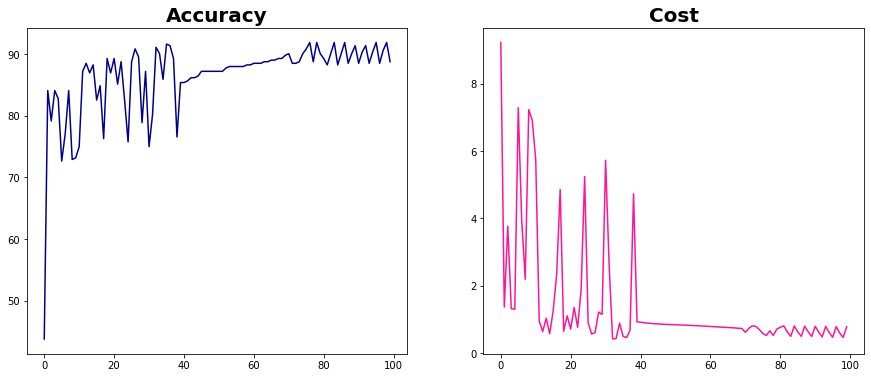

In [35]:
# Random initilize
layers_dims = [X_train.shape[0], 1]
parameters = model(X_train, y_train, layers_dims, initial_value = "Random", print_cost = True)

In [36]:
cost, accuracy = test_model(X_val, y_val, parameters)
print("Accuracy of Validation set: {:.8f}\nCost of Validation set: {:.8f}".format(accuracy, cost))

Accuracy of Validation set: 88.54166667
Cost of Validation set: 0.72420995


Iteration    0) 		 Loss: 0.69314718 		 Accuracy: 27.60416667
Iteration 1000) 		 Loss: 6.86008066 		 Accuracy: 73.95833333
Iteration 2000) 		 Loss: 0.89441434 		 Accuracy: 85.93750000
Iteration 3000) 		 Loss: 2.02146050 		 Accuracy: 81.77083333
Iteration 4000) 		 Loss: 0.90211218 		 Accuracy: 85.93750000
Iteration 5000) 		 Loss: 0.84048809 		 Accuracy: 87.23958333
Iteration 6000) 		 Loss: 0.78929587 		 Accuracy: 88.54166667
Iteration 7000) 		 Loss: 0.58343939 		 Accuracy: 90.62500000
Iteration 8000) 		 Loss: 0.59127731 		 Accuracy: 90.36458333
Iteration 9000) 		 Loss: 0.76522790 		 Accuracy: 89.58333333
Iteration 9999) 		 Loss: 0.59122235 		 Accuracy: 92.44791667


Maximum Accuracy of Training set: 92.70833333
Minimum Loss of Trainig set: 0.38833356



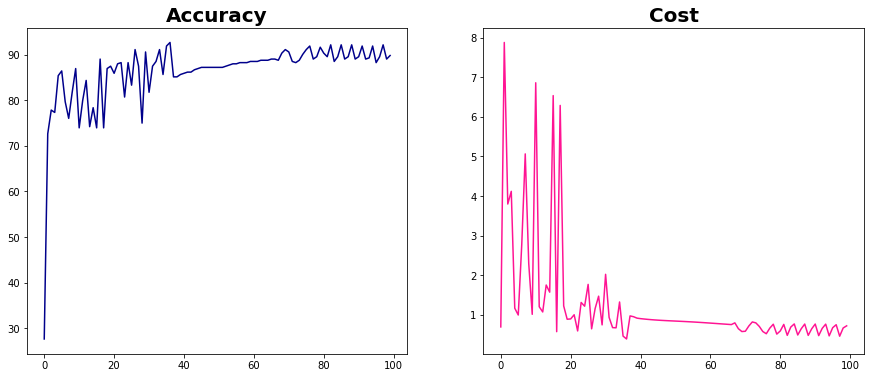

In [37]:
# Initialize with zero
layers_dims = [X_train.shape[0], 1]
parameters = model(X_train, y_train, layers_dims, initial_value = "Zero", print_cost = True)

In [38]:
cost, accuracy = test_model(X_val, y_val, parameters)
print("Accuracy of Validation set: {:.8f}\nCost of Validation set: {:.8f}".format(accuracy, cost))

Accuracy of Validation set: 88.54166667
Cost of Validation set: 0.67158403


## *3 Layer Model (One hidden layer)*

LINEAR ~> RELU ~> LINEAR ~> SIGMOID

Iteration    0) 		 Loss: 6.89478124 		 Accuracy: 52.86458333
Iteration 1000) 		 Loss: 0.16809586 		 Accuracy: 92.70833333
Iteration 2000) 		 Loss: 0.18363227 		 Accuracy: 90.62500000
Iteration 3000) 		 Loss: 0.08657815 		 Accuracy: 96.87500000
Iteration 4000) 		 Loss: 0.10284111 		 Accuracy: 96.35416667
Iteration 5000) 		 Loss: 0.06533560 		 Accuracy: 97.91666667
Iteration 6000) 		 Loss: 0.05493288 		 Accuracy: 97.91666667
Iteration 7000) 		 Loss: 0.05767712 		 Accuracy: 97.91666667
Iteration 8000) 		 Loss: 0.05304276 		 Accuracy: 97.91666667
Iteration 9000) 		 Loss: 0.05177616 		 Accuracy: 98.17708333
Iteration 9999) 		 Loss: 0.04186539 		 Accuracy: 98.69791667


Maximum Accuracy of Training set: 98.69791667
Minimum Loss of Trainig set: 0.04379755



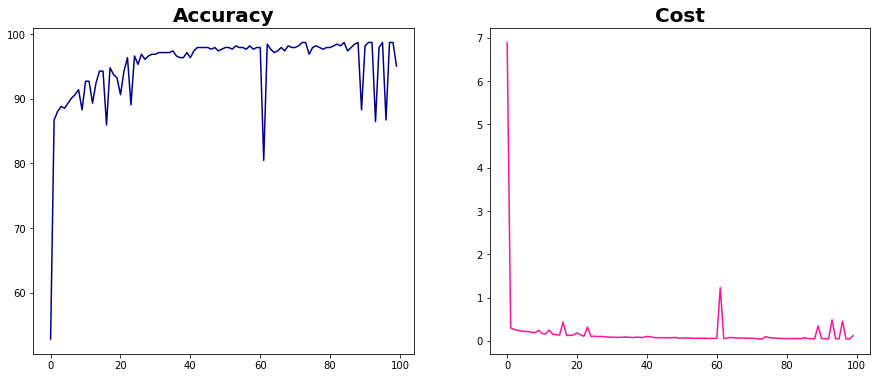

In [39]:
# Random initilize
layers_dims = [X_train.shape[0], 32, 1]
parameters = model(X_train, y_train, layers_dims, initial_value = "Random", num_iterations = 10000, print_cost = True)

In [40]:
cost, accuracy = test_model(X_val, y_val, parameters)
print("Accuracy of Validation set: {:.8f}\nCost of Validation set: {:.8f}".format(accuracy, cost))

Accuracy of Validation set: 90.62500000
Cost of Validation set: 0.42943098


Iteration    0) 		 Loss: 0.69314718 		 Accuracy: 27.60416667
Iteration 1000) 		 Loss: 0.58917585 		 Accuracy: 72.39583333
Iteration 2000) 		 Loss: 0.58917585 		 Accuracy: 72.39583333
Iteration 3000) 		 Loss: 0.58917585 		 Accuracy: 72.39583333
Iteration 4000) 		 Loss: 0.58917585 		 Accuracy: 72.39583333
Iteration 5000) 		 Loss: 0.58917585 		 Accuracy: 72.39583333
Iteration 6000) 		 Loss: 0.58917585 		 Accuracy: 72.39583333
Iteration 7000) 		 Loss: 0.58917585 		 Accuracy: 72.39583333
Iteration 8000) 		 Loss: 0.58917585 		 Accuracy: 72.39583333
Iteration 9000) 		 Loss: 0.58917585 		 Accuracy: 72.39583333
Iteration 9999) 		 Loss: 0.58917585 		 Accuracy: 72.39583333


Maximum Accuracy of Training set: 72.39583333
Minimum Loss of Trainig set: 0.58917585



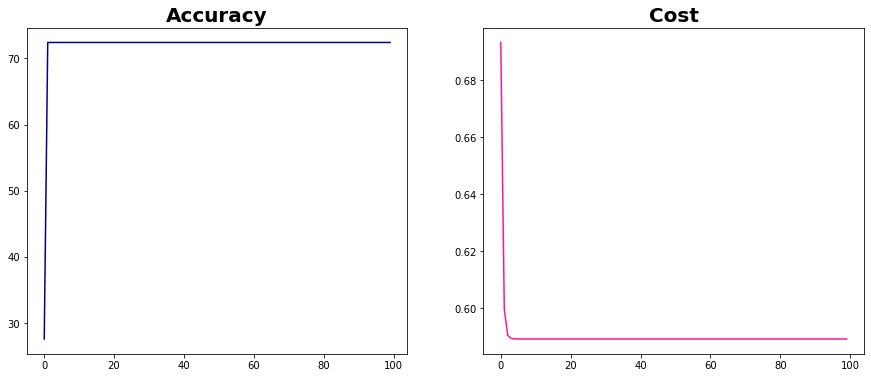

In [41]:
# Initialize with zero
layers_dims = [X_train.shape[0], 16, 1]
parameters = model(X_train, y_train, layers_dims, initial_value = "Zero", num_iterations = 10000, print_cost = True)

In [42]:
cost, accuracy = test_model(X_val, y_val, parameters)
print("Accuracy of Validation set: {:.8f}\nCost of Validation set: {:.8f}".format(accuracy, cost))

Accuracy of Validation set: 78.12500000
Cost of Validation set: 0.53393626


## *5 Layer Model (Three hidden layer)*

LINEAR ~> RELU ~> LINEAR ~> RELU ~> LINEAR ~> RELU ~> LINEAR ~> SIGMOID

Iteration    0) 		 Loss: 4.10846253 		 Accuracy: 71.87500000
Iteration 1000) 		 Loss: 0.24231402 		 Accuracy: 89.06250000
Iteration 2000) 		 Loss: 0.21385184 		 Accuracy: 90.88541667
Iteration 3000) 		 Loss: 0.18886653 		 Accuracy: 91.40625000
Iteration 4000) 		 Loss: 0.17206828 		 Accuracy: 91.66666667
Iteration 5000) 		 Loss: 0.23558928 		 Accuracy: 91.66666667
Iteration 6000) 		 Loss: 0.10685276 		 Accuracy: 96.09375000
Iteration 7000) 		 Loss: 0.09307900 		 Accuracy: 97.13541667
Iteration 8000) 		 Loss: 0.19087577 		 Accuracy: 93.22916667
Iteration 9000) 		 Loss: 0.18269591 		 Accuracy: 91.66666667
Iteration 10000) 		 Loss: 0.05195181 		 Accuracy: 98.43750000
Iteration 11000) 		 Loss: 0.09313227 		 Accuracy: 97.39583333
Iteration 12000) 		 Loss: 0.05833974 		 Accuracy: 97.91666667
Iteration 12999) 		 Loss: 0.03584620 		 Accuracy: 99.47916667


Maximum Accuracy of Training set: 99.21875000
Minimum Loss of Trainig set: 0.03939200



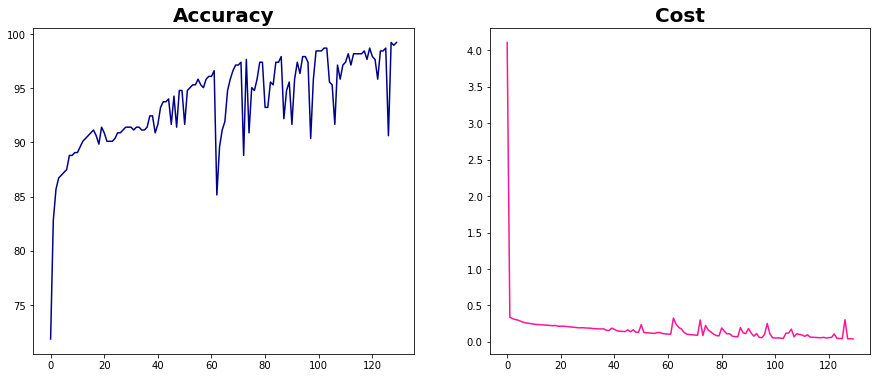

In [43]:
# Random initilize
layers_dims = [X_train.shape[0], 32, 8, 4, 1]
parameters = model(X_train, y_train, layers_dims, learning_rate = 0.01, initial_value = "Random", num_iterations = 13000, print_cost = True)

In [44]:
cost, accuracy = test_model(X_val, y_val, parameters)
print("Accuracy of Validation set: {:.8f}\nCost of Validation set: {:.8f}".format(accuracy, cost))

Accuracy of Validation set: 92.70833333
Cost of Validation set: 0.29645142


Iteration    0) 		 Loss: 0.69314718 		 Accuracy: 27.60416667
Iteration 1000) 		 Loss: 0.59044768 		 Accuracy: 72.39583333
Iteration 2000) 		 Loss: 0.58919784 		 Accuracy: 72.39583333
Iteration 3000) 		 Loss: 0.58917625 		 Accuracy: 72.39583333
Iteration 4000) 		 Loss: 0.58917586 		 Accuracy: 72.39583333
Iteration 5000) 		 Loss: 0.58917585 		 Accuracy: 72.39583333
Iteration 6000) 		 Loss: 0.58917585 		 Accuracy: 72.39583333
Iteration 7000) 		 Loss: 0.58917585 		 Accuracy: 72.39583333
Iteration 8000) 		 Loss: 0.58917585 		 Accuracy: 72.39583333
Iteration 9000) 		 Loss: 0.58917585 		 Accuracy: 72.39583333
Iteration 10000) 		 Loss: 0.58917585 		 Accuracy: 72.39583333
Iteration 11000) 		 Loss: 0.58917585 		 Accuracy: 72.39583333
Iteration 12000) 		 Loss: 0.58917585 		 Accuracy: 72.39583333
Iteration 13000) 		 Loss: 0.58917585 		 Accuracy: 72.39583333
Iteration 14000) 		 Loss: 0.58917585 		 Accuracy: 72.39583333
Iteration 14999) 		 Loss: 0.58917585 		 Accuracy: 72.39583333


Maximum Accuracy

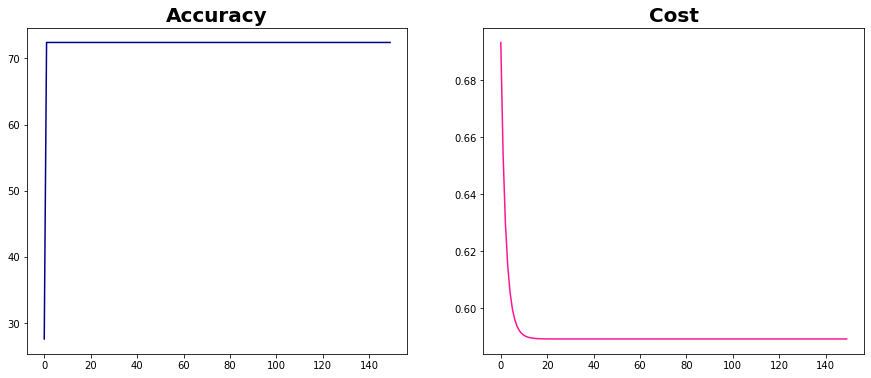

In [45]:
# Initialize with zero
layers_dims = [X_train.shape[0], 32, 8, 4, 1]
parameters = model(X_train, y_train, layers_dims, learning_rate = 0.01, initial_value = "Zero", num_iterations = 15000, print_cost = True)

In [46]:
cost, accuracy = test_model(X_val, y_val, parameters)
print("Accuracy of Validation set: {:.8f}\nCost of Validation set: {:.8f}".format(accuracy, cost))

Accuracy of Validation set: 78.12500000
Cost of Validation set: 0.53393626
